#  Blue Ridge Product Mix

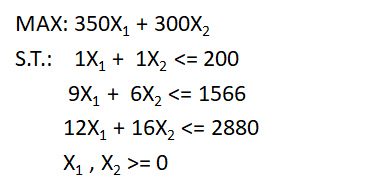

#### First, you're going to want to import the gurobipy library to your notebook

In [1]:
from gurobipy import *

#### Second, you will create a model to add your variables, objective, and constraints

In [2]:
m = Model('ProductMix')

Set parameter Username
Academic license - for non-commercial use only - expires 2023-03-27


#### Third, you will add your variables to the model

In [3]:
aqua = m.addVar(name='Aqua-Spa')

In [4]:
hydro = m.addVar(name='Hydro-Lux')

#### Fourth, add your objective to the model

In [5]:
m.setObjective(350*aqua + 300*hydro, GRB.MAXIMIZE)

The first argument to setObjective() is the objective function (the profit from each tub), and the second argument (GRB.MAXIMIZE) explains that this is a function we want to maximize

#### Fifth, add your constraints to the model

In [6]:
c1 = m.addConstr(aqua + hydro <= 200, name="pumps")

In [7]:
c2 = m.addConstr(9*aqua + 6*hydro <= 1566, name="labor")

In [8]:
c3 = m.addConstr(12*aqua + 16*hydro <= 2880, name="tubing")

The first argument to addConstr() is the function that describes the constraint, and the second argument is a name of the constraint (optional)

In [9]:
m.write('ProductMix.lp')

#### Now, our model is ready for optimization

In [10]:
m.optimize()

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 3 rows, 2 columns and 6 nonzeros
Model fingerprint: 0x2279ac3d
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [3e+02, 4e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+02, 3e+03]
Presolve time: 0.00s
Presolved: 3 rows, 2 columns, 6 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.6250000e+32   4.687500e+30   1.625000e+02      0s
       2    6.6100000e+04   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds (0.00 work units)
Optimal objective  6.610000000e+04


From this, we can see that our max profit is 66100, but how can we see the values for our decision variables?

In [11]:
m.getVars()

[<gurobi.Var Aqua-Spa (value 122.0)>, <gurobi.Var Hydro-Lux (value 78.0)>]

In [12]:
for v in m.getVars():
    print(v.varName, v.x)

Aqua-Spa 122.0
Hydro-Lux 78.0


In [13]:
m.printAttr("X")


    Variable            X 
-------------------------
    Aqua-Spa          122 
   Hydro-Lux           78 


In [14]:
print('Obj: ' + str(m.objVal))

Obj: 66100.0
